# **Water Masked Pothole Detection**

Potholes on road surfaces pose a significant challenge to transportation safety, vehicle performance, and road maintenance. When potholes are filled with water, their depth and severity become difficult to estimate, further increasing the risk to road users.

The timely and accurate detection of potholes—both dry and water-filled—is critical for ensuring road safety and optimizing maintenance efforts. However, traditional detection methods, such as manual inspections or basic image processing techniques, are time-intensive, labor-intensive, and prone to inaccuracies, particularly in diverse lighting and weather conditions.


## **YOLO**
YOLO (You Only Look Once) is a state-of-the-art object detection algorithm designed for fast and accurate real-time object detection in images and video streams. It is based on deep learning and employs a single convolutional neural network (CNN) to simultaneously detect and classify objects within an image in one pass, making it both efficient and powerful.

The key idea of the proposed solution include detecting both dry and water-filled potholes in real-time with high accuracy usin YOLOv8 model.

In [5]:
# Installing required packages
!pip install roboflow ultralytics

To train the model I used pothole images scrapped from web and kaggle datasets and created dataset for pothole detection using roboflow annotation tool.

Robflow link: https://roboflow.com/

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="")
project = rf.workspace("amaan-qxcbn").project("pothole-detection-rcgxi")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-Detection-2 in yolov8:: 100%|██████████| 1536/1536 [00:00<00:00, 5452.60it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Training**

Ultralytics is company that develops state-of-the-art AI and computer vision solutions, including the YOLO (You Only Look Once) series of object detection models.

Ultralytics provides an API for their YOLO models, which allows users to easily integrate object detection capabilities into their applications. The API supports various functionalities such as model training, inference, and evaluation.

In [6]:
from ultralytics import YOLO

# Load a YOLOv8 model
model = YOLO("yolov8n.pt")

# Train the model
model.train(data="/content/Pothole-Detection-2/data.yaml", epochs=50, imgsz=640, batch=16, name="yolov8_model",workers=4)


100%|██████████| 6.25M/6.25M [00:00<00:00, 72.6MB/s]


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Pothole-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.3MB/s]


AMP: checks passed ✅


train: Scanning /content/Pothole-Detection-2/train/labels... 534 images, 0 backgrounds, 0 corrupt: 100%|██████████| 534/534 [00:00<00:00, 1337.00it/s]


train: New cache created: /content/Pothole-Detection-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 2370. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Pothole-Detection-2/valid/labels... 152 images, 0 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<00:00, 1283.26it/s]

val: New cache created: /content/Pothole-Detection-2/valid/labels.cache


Plotting labels to runs/detect/yolov8_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G      1.898      2.601      1.638         58        640: 100%|██████████| 34/34 [00:07<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        152        501      0.927     0.0759      0.259      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.18G      1.867      1.898      1.544         72        640: 100%|██████████| 34/34 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all        152        501      0.329      0.321      0.228     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.26G      1.844      1.834      1.554         29        640: 100%|██████████| 34/34 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]

                   all        152        501     0.0922      0.295     0.0525     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.47G      1.823      1.778      1.568         43        640: 100%|██████████| 34/34 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.49it/s]

                   all        152        501      0.494      0.485      0.462      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.37G      1.806      1.674      1.535         56        640: 100%|██████████| 34/34 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]

                   all        152        501      0.372      0.377      0.325      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G      1.791      1.666      1.534         51        640: 100%|██████████| 34/34 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all        152        501       0.57      0.575      0.568      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.31G      1.785      1.618      1.513         38        640: 100%|██████████| 34/34 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]

                   all        152        501      0.543      0.551      0.544       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.34G      1.772      1.575      1.515         38        640: 100%|██████████| 34/34 [00:04<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all        152        501      0.631      0.542      0.564      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G      1.743      1.518      1.493         41        640: 100%|██████████| 34/34 [00:04<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

                   all        152        501      0.541      0.623      0.607      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.48G      1.756      1.479      1.494         56        640: 100%|██████████| 34/34 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all        152        501      0.666      0.611      0.657      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.16G      1.744      1.439      1.484         33        640: 100%|██████████| 34/34 [00:04<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all        152        501      0.435      0.495      0.454      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.28G       1.74      1.428      1.478         31        640: 100%|██████████| 34/34 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all        152        501       0.64      0.647      0.678      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.37G      1.716      1.389       1.48         21        640: 100%|██████████| 34/34 [00:04<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all        152        501      0.673      0.641      0.696      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.27G      1.706      1.385      1.468         46        640: 100%|██████████| 34/34 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]

                   all        152        501       0.74      0.613       0.71      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.38G      1.697      1.343      1.446         16        640: 100%|██████████| 34/34 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all        152        501      0.713      0.631      0.718       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.43G      1.658       1.29      1.411         27        640: 100%|██████████| 34/34 [00:05<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.37it/s]

                   all        152        501      0.687      0.618      0.692      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.42G      1.681      1.308      1.413         50        640: 100%|██████████| 34/34 [00:04<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]

                   all        152        501      0.735      0.664      0.707      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G      1.634      1.285      1.406         41        640: 100%|██████████| 34/34 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all        152        501      0.677      0.659      0.716      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.31G      1.634      1.254      1.404         65        640: 100%|██████████| 34/34 [00:04<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

                   all        152        501       0.77      0.634      0.724      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.41G      1.658      1.257      1.419         33        640: 100%|██████████| 34/34 [00:04<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all        152        501      0.732      0.669       0.74      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.43G      1.597      1.227      1.385         37        640: 100%|██████████| 34/34 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]

                   all        152        501      0.773      0.665       0.75      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.37G      1.601      1.236      1.409         50        640: 100%|██████████| 34/34 [00:04<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all        152        501      0.733      0.675      0.729      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.5G       1.63      1.216      1.392         24        640: 100%|██████████| 34/34 [00:05<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all        152        501      0.743      0.671      0.753      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.37G      1.594       1.19      1.385         26        640: 100%|██████████| 34/34 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]

                   all        152        501      0.699      0.681      0.742      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.3G      1.587      1.193      1.361         18        640: 100%|██████████| 34/34 [00:05<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]

                   all        152        501      0.705      0.707       0.74      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.37G      1.605       1.19      1.378         32        640: 100%|██████████| 34/34 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all        152        501      0.726      0.693      0.766      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G      1.583      1.155      1.363         49        640: 100%|██████████| 34/34 [00:04<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all        152        501      0.736      0.691      0.763      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.2G      1.558      1.143      1.372         25        640: 100%|██████████| 34/34 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]

                   all        152        501      0.732      0.658      0.726      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.31G       1.57      1.101      1.367         41        640: 100%|██████████| 34/34 [00:04<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]

                   all        152        501       0.76      0.711      0.771      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.26G      1.545      1.107      1.351         35        640: 100%|██████████| 34/34 [00:05<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]

                   all        152        501      0.716      0.704      0.752      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.3G       1.53      1.096      1.343         42        640: 100%|██████████| 34/34 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all        152        501      0.784       0.68       0.77      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.24G      1.523      1.076      1.327         43        640: 100%|██████████| 34/34 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all        152        501      0.794      0.685      0.793      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.17G      1.508      1.048      1.327         22        640: 100%|██████████| 34/34 [00:04<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]

                   all        152        501      0.806      0.675      0.776      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.24G       1.51      1.043      1.328         32        640: 100%|██████████| 34/34 [00:05<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all        152        501      0.795      0.705      0.809      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.29G       1.49      1.016      1.303         52        640: 100%|██████████| 34/34 [00:04<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]

                   all        152        501      0.794      0.709      0.789      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.4G      1.516      1.067      1.333         15        640: 100%|██████████| 34/34 [00:05<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all        152        501      0.765      0.693      0.784      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.27G       1.49       1.02      1.295        106        640: 100%|██████████| 34/34 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all        152        501      0.771      0.715      0.792      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.16G      1.447      1.007      1.284         48        640: 100%|██████████| 34/34 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

                   all        152        501      0.789      0.715      0.796      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.31G      1.459      1.014      1.308         62        640: 100%|██████████| 34/34 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]

                   all        152        501      0.806      0.683      0.788      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.28G      1.451      0.969      1.297         34        640: 100%|██████████| 34/34 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all        152        501      0.783      0.701      0.796      0.404


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.26G      1.474     0.9984      1.311         15        640: 100%|██████████| 34/34 [00:05<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all        152        501      0.783      0.683      0.773      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.26G      1.438     0.9368      1.275         33        640: 100%|██████████| 34/34 [00:04<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

                   all        152        501      0.723      0.733      0.775      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.29G      1.417     0.9098      1.272         22        640: 100%|██████████| 34/34 [00:05<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all        152        501       0.78      0.723      0.795      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.29G      1.389     0.8747      1.246         54        640: 100%|██████████| 34/34 [00:04<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.69it/s]

                   all        152        501       0.77      0.729      0.797      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.27G      1.382     0.8784      1.259         12        640: 100%|██████████| 34/34 [00:04<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all        152        501      0.768      0.754      0.804      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.24G      1.399     0.8758      1.271         40        640: 100%|██████████| 34/34 [00:04<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all        152        501      0.789      0.745      0.804      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.27G      1.353     0.8516      1.235         37        640: 100%|██████████| 34/34 [00:04<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.44it/s]

                   all        152        501      0.786      0.747      0.809      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.24G      1.348      0.836      1.242         33        640: 100%|██████████| 34/34 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]

                   all        152        501      0.791      0.745      0.813      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G      1.341     0.8192       1.24         11        640: 100%|██████████| 34/34 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]

                   all        152        501      0.789       0.76      0.817      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.27G      1.322     0.8177      1.238         11        640: 100%|██████████| 34/34 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.73it/s]

                   all        152        501      0.776      0.766      0.816       0.43



50 epochs completed in 0.093 hours.
Optimizer stripped from runs/detect/yolov8_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_model/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_model/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]


                   all        152        501      0.775      0.766      0.816       0.43
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/yolov8_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e36b838c490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Pothole-Detection-2/valid/labels.cache... 152 images, 0 backgrounds, 0 corrupt: 100%|██████████| 152/152 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]


                   all        152        501      0.774      0.766      0.816      0.429
Speed: 0.2ms preprocess, 7.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/yolov8_model2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e379ffc8c70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,  

## **Results**:
**Precision**: 0.7739662554242401

**Recall**: 0.7664670658682635

**mAP50**: 0.8163534484350972

Model achieved a good enough mean average precision ~ 81% at IOU threshold 0.5.

In [10]:
# save model
model.save()

# **Inference**

In [17]:
# Load the trained model
model = YOLO('saved_model.pt')

# Export in onnx format
model.export(format='onnx')

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.30GHz)

PyTorch: starting from 'saved_model.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.47...
ONNX: export success ✅ 21.6s, saved as 'saved_model.onnx' (11.7 MB)

Export complete (21.8s)
Results saved to /content
Predict:         yolo predict task=detect model=saved_model.onnx imgsz=640  
Validate:        yolo val task=detect model=saved_model.onnx imgsz=640 data=/content/Pothole-Detection-2/data.yaml  
Visualize:       https://netron.app


'saved_model.onnx'


image 1/1 /content/Pothole-Detection-2/test/images/109_jpg.rf.8e0c112a1f2af05728fa260d1cd29ad7.jpg: 640x640 1 pothole, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Pothole-Detection-2/test/images/255_jpg.rf.903399970e11a9f77fecd8593bfbdb28.jpg: 640x640 1 pothole, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Pothole-Detection-2/test/images/283_jpg.rf.ad35a303d7caa4464f115d6d450dda39.jpg: 640x640 7 potholes, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Pothole-Detection-2/test/images/107_jpg.rf.658679c45c2feb799a07acb851b8ad94.jpg: 640x640 1 pothole, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Pothole-Detection-2/test/images/52_jpg.rf.b4e580d6c0ec463ad9f1659c96e11b8d.jpg: 640x640 4 p

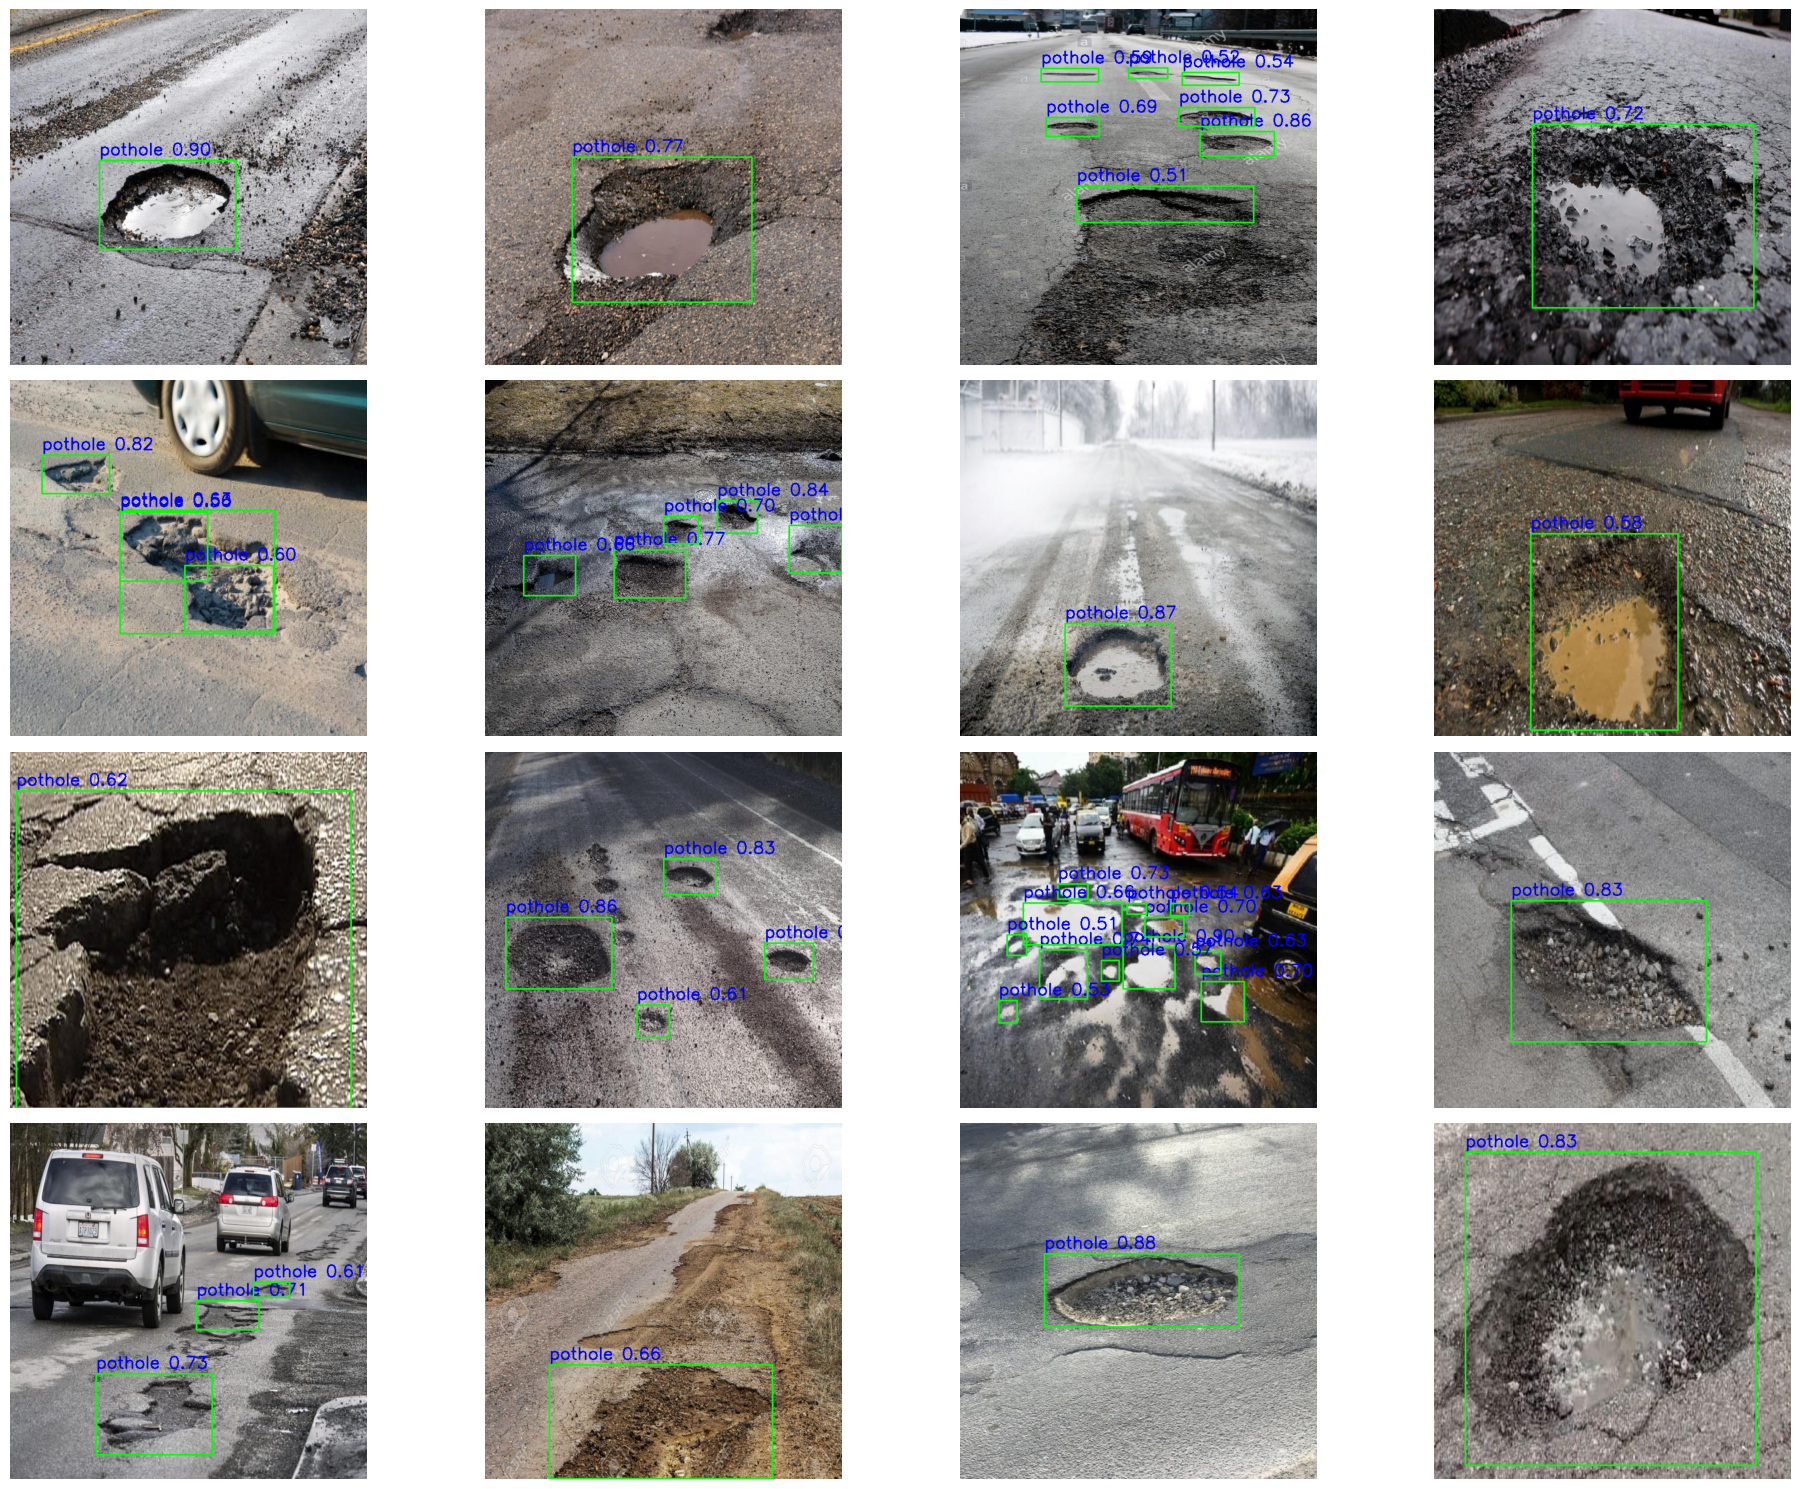

In [18]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


def non_max_suppression(boxes, scores, threshold):
    # If no bounding boxes, return an empty list
    if len(boxes) == 0:
        return []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1] # Sort by scores in descending order

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)

        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1 + 1)
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h

        ovr = inter / (areas[i] + areas[order[1:]] - inter)

        inds = np.where(ovr <= threshold)[0]
        order = order[inds + 1]

    return keep

test_images_dir = "/content/Pothole-Detection-2/test/images"
test_image_paths = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith(('.jpg', '.jpeg', '.png'))]
test_image_paths = test_image_paths[60:]

rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Process and plot each image
for i, image_path in enumerate(test_image_paths):
    # Perform prediction
    results = model.predict(source=image_path, save=False, conf=0.5)

    # Load the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract results and draw bounding boxes with NMS
    boxes = []
    scores = []
    for result in results:
        if result.boxes.data.nelement() > 0: #Check if there are any boxes
            for box in result.boxes.data.tolist():
                x1, y1, x2, y2, confidence, class_id = box[:6]
                boxes.append([x1, y1, x2, y2])
                scores.append(confidence)

    if boxes: # apply NMS only if boxes exist
        boxes = np.array(boxes)
        scores = np.array(scores)
        indices = non_max_suppression(boxes, scores, threshold=0.5)

        for index in indices:
            x1, y1, x2, y2 = boxes[index]
            confidence = scores[index]
            label = f"{model.names[int(result.boxes.cls[index])]} {confidence:.2f}"
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(0, 255, 0), thickness=2)
            cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Plot the image in the grid
    ax = axes[i // cols, i % cols]
    ax.imshow(image)
    ax.axis("off")
plt.tight_layout()
plt.show()